# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/HybridImages/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [ ]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
im1_file = datadir + 'pig.jpg'
im2_file = datadir + 'hedgehog.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

# # FFT of image 1
# fftmag1 = np.abs(np.fft.fftshift(np.fft.fft2(im1)))
# plt.imshow(fftmag1,norm=LogNorm(fftmag1.min(),fftmag1.max()),cmap='jet')

# # FFT of image 2
# fftmag2 = np.abs(np.fft.fftshift(np.fft.fft2(im2)))
# plt.imshow(fftmag2,norm=LogNorm(fftmag2.min(),fftmag2.max()),cmap='jet')

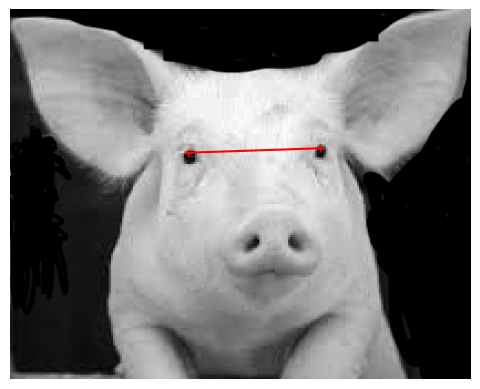

In [ ]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[160, 129], [280, 125]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

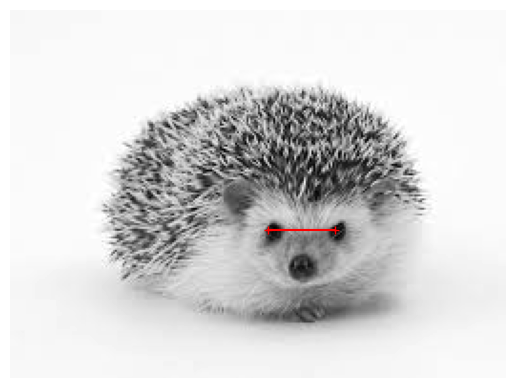

In [ ]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[135, 115], [170, 115]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [ ]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [ ]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

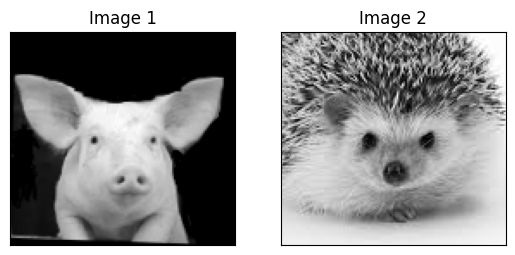

In [ ]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [ ]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''

    # For a low-pass filter, Oliva et al. suggest using a standard 2D Gaussian filter
    ksize_low = int(np.ceil(sigma_low)*6+1)
    fil_low = cv2.getGaussianKernel(ksize_low, sigma_low)
    fil_low = fil_low * np.transpose(fil_low)

    im_fil_low = cv2.filter2D(im1, -1, fil_low)

    # impulse filter minus the Gaussian filter
    # (which can be computed by subtracting the Gaussian-filtered image from the original)
    ksize_high = int(np.ceil(sigma_high)*6+1)
    fil_high = cv2.getGaussianKernel(ksize_high, sigma_high)
    fil_high = fil_high * np.transpose(fil_high)

    im_fil_high = cv2.filter2D(im2, -1, fil_high)

    # Subtract from original
    im_fil_high = im2 - im_fil_high

    # # Plot the low pass filter image
    # plt.figure(figsize=(10,10))
    # plt.imshow(im_fil_low,cmap='gray')

    # # Plot the high pass filter image
    # plt.figure(figsize=(10,10))
    # plt.imshow(im_fil_high,cmap='gray')

    # # FFT of low-pass filtered image
    # fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_fil_low)))
    # plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

    # # FFT of high-pass filtered image
    # fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_fil_high)))
    # plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

    return im_fil_low + im_fil_high





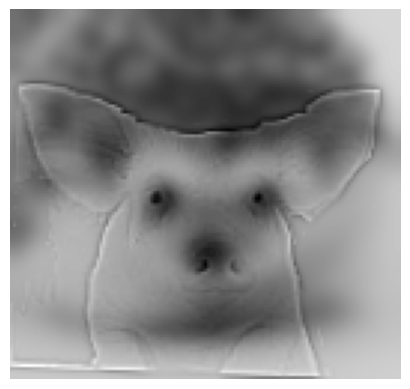

In [ ]:
#
sigma_low = 3
sigma_high = 1

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)
cropped_object = utils.interactive_crop(im_hybrid)

# # FFT of hybrid image
# fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))
# plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

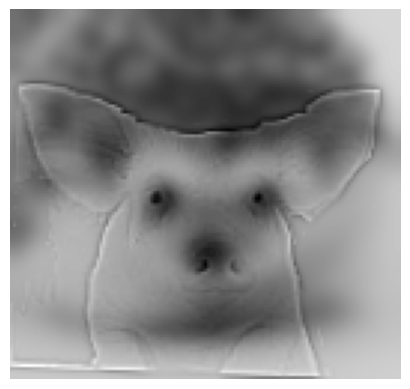

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement

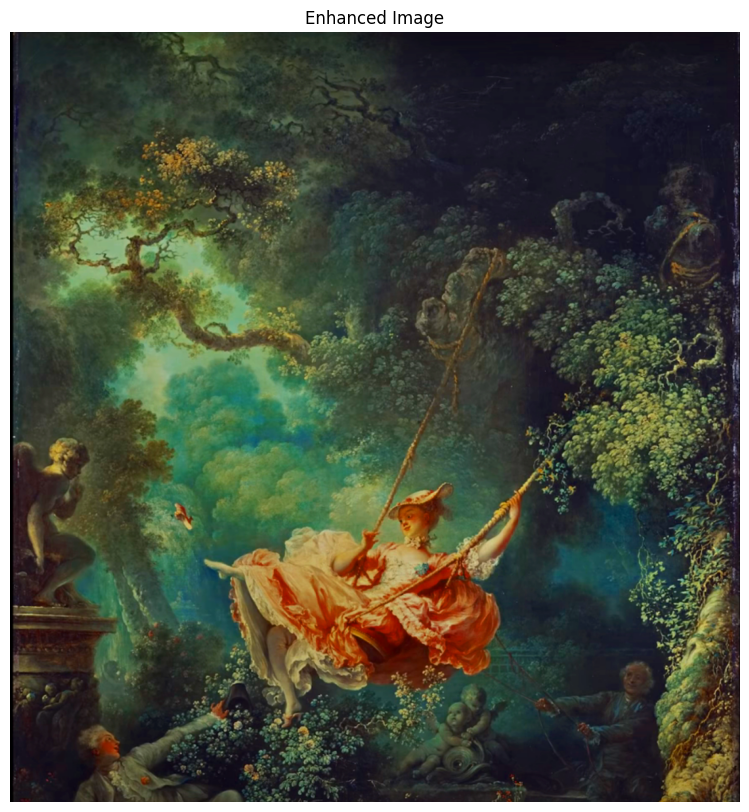

In [ ]:
# Get initial image to enhance and convert to HSV
startImage = cv2.imread(datadir + 'enhance.jpg')
im_HSV = cv2.cvtColor(startImage, cv2.COLOR_BGR2HSV)

# Choose saturation factor
factor = 2
# Loop through each pixel and adjust saturation
for i in range(im_HSV.shape[0]):
    for j in range(im_HSV.shape[1]):
        curSat = im_HSV[i, j, 1]
        # Limit new saturation to [0, 255]
        newSat = min(curSat * factor, 255)
        im_HSV[i, j, 1] = newSat

# Convert back to RGB
enhancedImage = cv2.cvtColor(im_HSV, cv2.COLOR_HSV2BGR)

# Display the final result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(enhancedImage, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.show()

#### Color shift

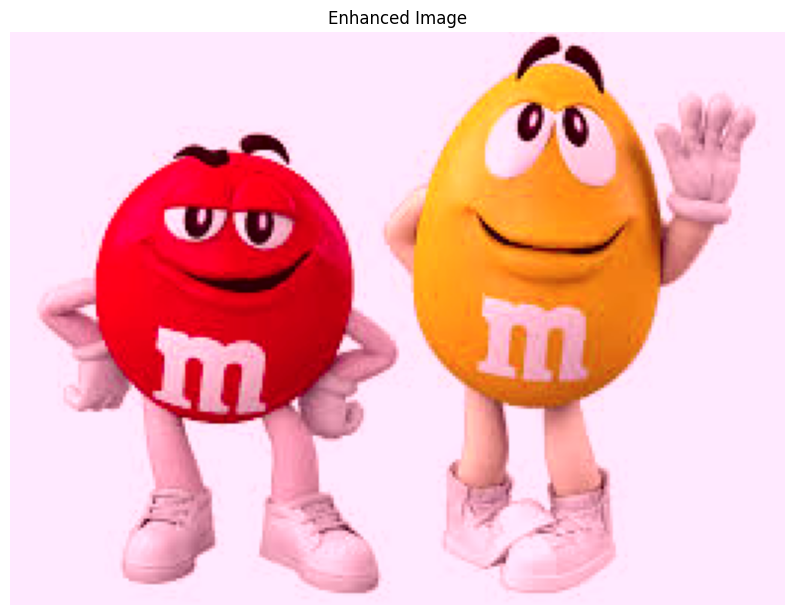

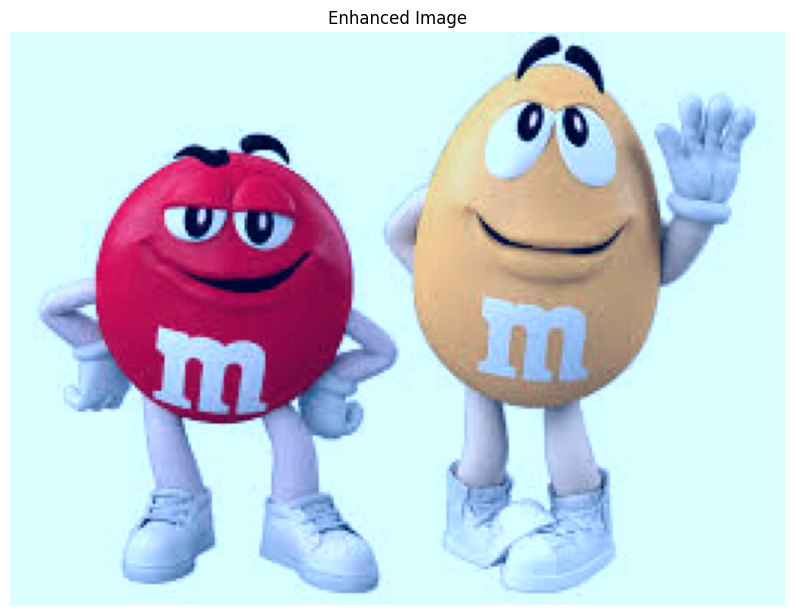

In [ ]:
# Get initial image to enhance and convert to HSV
startImage = cv2.imread(datadir + 'mnm.jpg')
im_LAB = cv2.cvtColor(startImage, cv2.COLOR_BGR2LAB)
redImage = im_LAB.copy()
yellowImage = im_LAB.copy()

# Choose factor to increase redness and decrease yellowness
redFac = 1.25
yellowFac = 0.75

# Loop through each pixel and adjust color
for i in range(im_LAB.shape[0]):
    for j in range(im_LAB.shape[1]):
      curRed = redImage[i, j, 1]
      curYellow = yellowImage[i, j, 2]

      # Limit new red to [0, 255]
      newRed = min(curRed * redFac, 255)
      redImage[i, j, 1] = newRed

      # Limit new yellow to [0, 255]
      newYellow = max(curYellow * yellowFac, 0)
      yellowImage[i, j, 2] = newYellow

# Convert back to RGB
redImage = cv2.cvtColor(redImage, cv2.COLOR_LAB2BGR)
yellowImage = cv2.cvtColor(yellowImage, cv2.COLOR_LAB2BGR)

# Display the red result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(redImage, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.show()

# Display the yellow result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(yellowImage, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.show()